In [ ]:
#ques1

Dataset Head:
    Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---

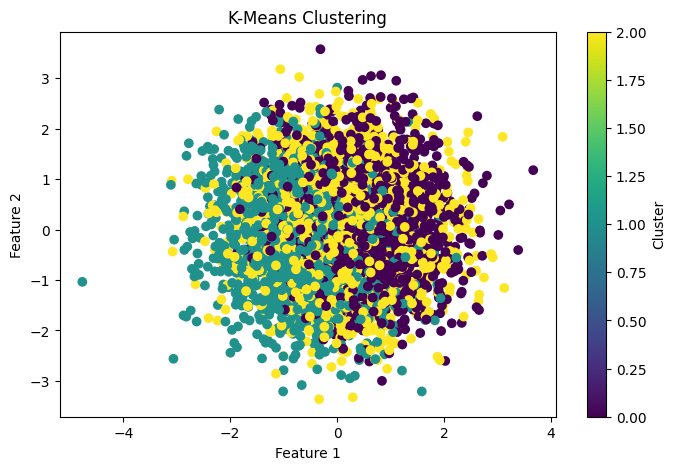

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset (replace 'your_dataset.csv' with your actual file path)
file_path = 'dataset.csv'  # Update this with the actual file path
data = pd.read_csv(file_path)

# Step 2: Inspect the dataset (Optional)
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n", data.info())

# Step 3: Drop the last column (assuming it's the label/target column)
data = data.iloc[:, :-1]

# Step 4: Handle missing values (if any)
data = data.dropna()

# Step 5: Feature scaling (normalize the data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 6: Implement K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(data_scaled)

# Step 7: Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Step 8: Print the cluster centers and labels
print("\nCluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Labels:\n", kmeans.labels_)

# Step 9: Visualize the Clusters (if the dataset has 2 or 3 dimensions)
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
#ques2

In [ ]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.1 MB/s eta 0:00:00


Dataset Head:
    Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---

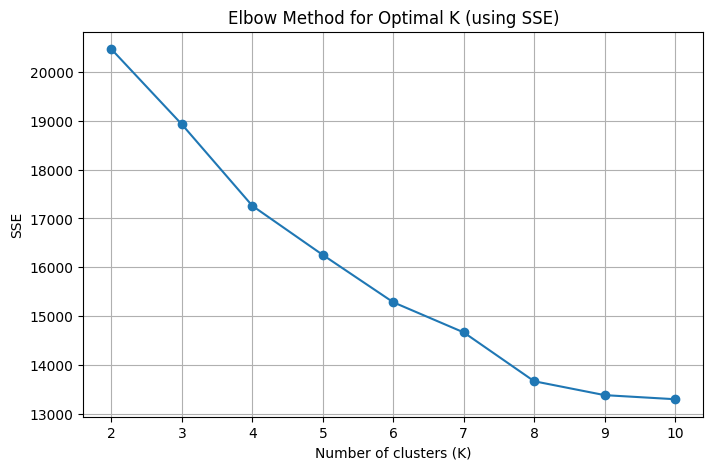

Silhouette Score for K=3: 0.13


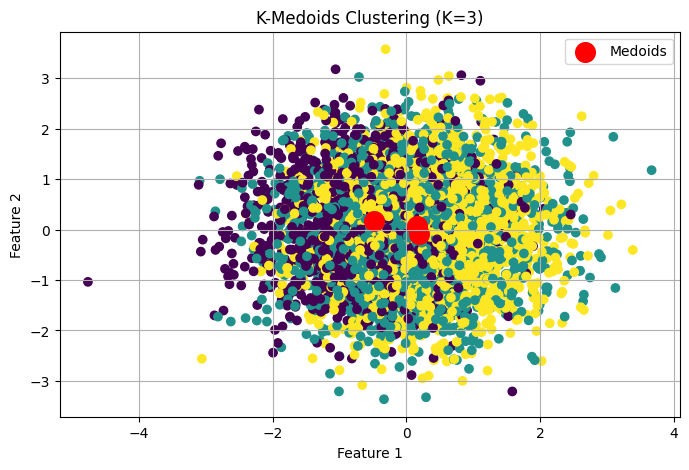

In [ ]:
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset (update the path with your file location)
file_path = 'dataset.csv'  # Replace with the actual path of your dataset
data = pd.read_csv(file_path)

# Inspect the data
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n", data.info())

# Drop the last column as requested
data = data.iloc[:, :-1]

# Handle missing values (if any)
data.dropna(inplace=True)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

### Function to calculate SSE (Sum of Squared Errors)
def calculate_sse(data, labels, medoids):
    sse = 0
    for i in range(len(data)):
        sse += np.sum((data[i] - data[medoids[labels[i]]]) ** 2)
    return sse

# Use the Elbow Method to determine the best K
sse_list = []
K_range = range(2, 11)

for k in K_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(data_scaled)
    labels = kmedoids.labels_
    sse = calculate_sse(data_scaled, labels, kmedoids.medoid_indices_)
    sse_list.append(sse)

# Plot the SSE values to use the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse_list, marker='o')
plt.title('Elbow Method for Optimal K (using SSE)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

# Based on the elbow plot, choose the best value of K (let's assume it's 3 for now)
optimal_k = 3
kmedoids_optimal = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids_optimal.fit(data_scaled)

# Assign the clusters to the original data
data['Cluster'] = kmedoids_optimal.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_scaled, kmedoids_optimal.labels_)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg:.2f}")

# Visualize the clusters (if 2-dimensional)
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmedoids_optimal.labels_, cmap='viridis')
plt.scatter(data_scaled[kmedoids_optimal.medoid_indices_, 0],
            data_scaled[kmedoids_optimal.medoid_indices_, 1],
            s=200, c='red', label='Medoids')
plt.title(f'K-Medoids Clustering (K={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
